<a href="https://colab.research.google.com/github/GUC-DM/w23-mini-project-1-mariam-haggagt02-reem-khaledt02/blob/main/Regression_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-1-4548f410a86e>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
print (df.dtypes) # we want to see the data type of each column so that we know what columns have wrong data type for example what numerical columns are inserted as a wrong type.
print (df.columns) #we want to print all the columns

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object
Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [ ]:
df["color"].unique() # to show all the unique values in the column color without repetition so we can check for any inconcistencies

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

In [ ]:
df["year"].unique() # to show all the unique values in the column year without repetition so we can check for any inconcistencies

array([2013, 2014, 2012, 2002, 2007, 2008, 2011, 2015, 2010, 2005, 2006,
       2009, 2004, 1998, 2001, 2003, 1996, 1997, 2000, 1999, 1995, 1991,
       1990, 1994, 1993, 1992])

In [ ]:
df["trim"].unique() # to show all the unique values in the column trim without repetition so we can check for any inconcistencies

array(['GLS', 'SR5', 'Base', ..., 'Base PZEV', 'Natural Gas',
       '10th Anniversary'], dtype=object)

In [ ]:
df["body"].unique() # to show all the unique values in the column body without repetition so we can check for any inconcistencies

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

In [ ]:
df["transmission"].unique() # to show all the unique values in the column transmission without repetition so we can check for any inconcistencies

array(['automatic', 'manual'], dtype=object)

In [ ]:
df["vin"].unique() # to show all the unique values in the column vin without repetition so we can check for any inconcistencies

array(['5npeb4acxdh702805', 'jtezu5jr2e5064567', 'jthbf5c24c5168599', ...,
       'wba3a5c56df356614', '4t1bf1fk8du254684', 'knadm4a32d6164825'],
      dtype=object)

In [ ]:
df["state"].unique() # to show all the unique values in the column state without repetition so we can check for any inconcistencies

array(['ma', 'fl', 'wa', 'co', 'ca', 'il', 'nv', 'mo', 'tx', 'ne', 'md',
       'nj', 'la', 'ny', 'nc', 'ut', 'va', 'ga', 'tn', 'oh', 'ms', 'pa',
       'or', 'mi', 'wi', 'az', 'pr', 'mn', 'in', 'hi', 'sc', 'ok', 'nm',
       'al'], dtype=object)

In [ ]:
df["condition"].unique() # to show all the unique values in the column condition without repetition so we can check for any inconcistencies

array([3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5. , 4.4, 2.7, 1. , 4.2, 2.5,
       3.5, 4. , 3. , 3.1, 2.4, 4.7, 4.5, 3.3, 2.9, 3.4, 2.8, 2.1, 4.3,
       2.3, 3.7, 3.2, 2. , 2.2, 2.6, 3.8, 4.8, 1.4, 1.6, 1.1, 1.8, 1.3,
       1.5, 1.2])

In [ ]:
df["odometer"].unique() # to show all the unique values in the column odometer without repetition so we can check for any inconcistencies

array(['50404.0mi', '17846.0mi', '21122.0mi', ..., '45357.0mi',
       '43376.0mi', '49953.0mi'], dtype=object)

In [ ]:
df["interior"].unique() # to show all the unique values in the column interior without repetition so we can check for any inconcistencies

array(['gray', '—', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [ ]:
df["seller"].unique()# to show all the unique values in the column seller without repetition so we can check for any inconcistencies

array(['the hertz corporation', 'award auto sales and leasing inc',
       'lexus financial services', ..., 'bmw of fresno',
       'my mint car corp', 'carter federal credit union'], dtype=object)

In [ ]:
df["mmr"].unique() # to show all the unique values in the column mmr without repetition so we can check for any inconcistencies

array(['$11000', '$28700', '$22200', ..., '$51500', '$57900', '$94000'],
      dtype=object)

In [ ]:
df["sellingprice"].unique() # to show all the unique values in the column sellingprice without repetition so we can check for any inconcistencies

array(['$10900', '$29900', '$24200', '$3200', '$22100', '$15500',
       '$13600', '$14700', '$20000', '$27500', '$22250', '$23700',
       '$12000', '$3700', '$5500', '$7300', '$800', '$18000', '$12500',
       '$8900', '$36500', '$5900', '$16300', '$17800', '$8300', '$3000',
       '$700', '$5100', '$23000', '$9100', '$40250', '$17900', '$51000',
       '$20600', '$12900', '$9200', '$19600', '$18900', '$25000', '$8600',
       '$20900', '$28750', '$31700', '$11900', '$1250', '$6700', '$8200',
       '$2800', '$27000', '$21300', '$9500', '$13200', '$11400', '$8700',
       '$11200', '$13700', '$17000', '$22300', '$5200', '$3400', '$19800',
       '$1100', '$19000', '$7500', '$2100', '$19300', '$12800', '$8000',
       '$11600', '$13900', '$9000', '$8400', '$4800', '$15700', '$15000',
       '$14400', '$20400', '$14600', '$34000', '$13750', '$8500',
       '$10300', '$10600', '$10000', '$1300', '$30000', '$6200', '$25500',
       '$12100', '$11000', '$22800', '$44250', '$7100', '$12600

In [ ]:
df["saledate"].unique() # to show all the unique values in the column saledate without repetition so we can check for any inconcistencies

array(['Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)',
       'Wed Feb 18 2015 07:15:00 GMT-0800 (PST)',
       'Tue Jan 20 2015 01:30:00 GMT-0800 (PST)', ...,
       'Wed Mar 04 2015 01:45:00 GMT-0800 (PST)',
       'Wed Jun 17 2015 02:45:00 GMT-0700 (PDT)',
       'Tue Apr 28 2015 04:30:00 GMT-0700 (PDT)'], dtype=object)

In [ ]:
df["model"].unique() # to show all the unique values in the column model without repetition so we can check for any inconcistencies

array(['Sonata', '4Runner', 'IS 250', 'X5', 'E-Series Van', 'Optima',
       'Avalanche', 'CTS', 'E-Class', 'Forte', 'Wrangler', 'G Sedan',
       'MKS', 'Soul', 'Ranger', 'Mazda6', 'Tundra', 'PT Cruiser',
       'Acadia', 'Mustang', 'Odyssey', 'X3', 'STS', 'F-150', 'Sienna',
       'Liberty', 'DTS', 'Sebring', 'Nitro', 'Tacoma', 'Elantra', 'Q7',
       'Maxima', 'Corvette', 'Grand Cherokee', 'FJ Cruiser', 'Fiesta',
       'Genesis', 'Town and Country', 'F-350 Super Duty', 'Z4', 'Murano',
       'Enclave', 'Altima', 'Sentra', 'R-Class', 'Sierra 1500', 'Cooper',
       'XJ', 'Edge', 'Focus', 'Avenger', 'Civic', 'Escape', 'Camry',
       'Encore', 'Accord', 'Sonic', 'Yukon', 'XF', 'Savana Cargo',
       'Fusion', '200', 'Cruze', 'MKX', 'Stratus', 'S60', 'Taurus',
       'Corolla', 'CR-V', 'Tucson', 'Charger', 'Lancer', 'Malibu',
       'Mazda3', 'Jetta', 'Elantra GT', '3 Series', 'Leaf',
       'Express Cargo', 'Outlander Sport', 'Venza', 'F-250 Super Duty',
       'Versa', 'Rogue', 'Imp

In [ ]:
df.info() # it gives us information about the data type and how many non-null values are there in each column so we can get a better understanding of the data
df.describe() #we mainly did this to get the count. min. standard daviation and min and max of each numerical column of dat ato get a better understanding of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


In [ ]:
df.isnull().sum() # we wanted to know how many null values are there in each column so we can replace them

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df['sellingprice'] = df['sellingprice'].str.replace('$', '').astype(int) #we removed the dollar sign to be able to resolve the inconsistency here as selling price is a numerical column and was  inserted as an object. We then changed selling price into int.

<ipython-input-20-44d8a66d06d2>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sellingprice'] = df['sellingprice'].str.replace('$', '').astype(int) #we removed the dollar sign to be able to resolve the inconsistency here as selling price is a numerical column and was  inserted as an object. We then changed selling price into int.


In [ ]:
df.info()  # we used these two to check that what we did worked and that the column selling price was changed into int instead of object.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  int64  
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 5.7+ MB


,year,condition,sellingprice
count,46578.000000,46578.000000,46578.000000
mean,2010.203401,3.424265,13669.705204
std,3.831316,0.944009,9632.257208
min,1990.000000,1.000000,150.000000
25%,2008.000000,2.700000,7100.000000
50%,2012.000000,3.600000,12200.000000
75%,2013.000000,4.200000,18200.000000
max,2015.000000,5.000000,230000.000000


In [ ]:
df['mmr'] = df['mmr'].str.replace('$', '').astype(int) #we removed the dollar sign to be able to resolve the inconsistency here as mmr is a numerical column and was  inserted as an object. We then changed mmr  into int.


<ipython-input-22-17d7a11b9334>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['mmr'] = df['mmr'].str.replace('$', '').astype(int) #we removed the dollar sign to be able to resolve the inconsistency here as mmr is a numerical column and was  inserted as an object. We then changed mmr  into int.


In [ ]:
df['saledate'] = pd.to_datetime(df['saledate']) # we believe that the saledate is of type datetime and not a regular object so we changed it

In [ ]:
df = df.drop('mmr', axis=1) # we believe that the mmr will not affect the selling price and is an unnecessary column as the price of the wholesaler or the market doen't impact the price in used cars auction sales and according to the domain knowledge we have reached that mmr will not affect the dependant variable (sellingprice) in any way.

In [ ]:
df = df.drop('vin', axis=1) # we believe that the vin will not affect the selling price and is an unnecessary column as the unique values don't impact the dependant variable selling price in any way or form and unique values columns should always be eliminated as they don't help us in showing any correlation.

In [ ]:
df = df.drop('saledate', axis=1) # we believe that the column saledate does not affect the dependant variable sellingprice as it is when the car was sold, we believe that this is an unnecessary column so we dropped it(removed it).

In [ ]:
df = df.drop('state', axis=1) # the column state is the USA state where the car was auctioned and it will not affect neither our model nor the selling price(the independant variable)

In [ ]:
df = df.drop('seller', axis=1) # the column seller will not affect the independant variable(selling price) as the seller is not an indicator of selling price and is an unnecessary variable.

In [ ]:
#df = df.drop('color', axis=1)

In [ ]:
#df = df.drop('interior', axis=1)

In [ ]:
df['odometer'] = df['odometer'].str.replace('mi', '').astype(float) #we  removed the mi sign in the column odometer as we believe it is a numerical column and to be able to change it to float. We then changed it to float and not int for increased accuracy

In [ ]:
#df['odometer'] = df['odometer'] * 1.60934 #we believe that the odometer should give values in kilometers and not miles so we changed from miles to kilometers

In [ ]:
df['odometer'].unique() # we wanted to check if what we did is showing

array([50404., 17846., 21122., ..., 45357., 43376., 49953.])

In [ ]:
df['odometer'].unique()

array([50404., 17846., 21122., ..., 45357., 43376., 49953.])

In [ ]:
df['body']= df['body'].str.capitalize() # The body values should all be the same and there were several inconsistencies so we had to capitalize each word, so for example if we have a g sedan it will be G sedan where the first letter is capital in all dat a


In [ ]:
df['body'].unique() # we wanted to check what we did and the output

array(['Sedan', 'Suv', 'E-series van', 'Crew cab', 'G sedan', 'Wagon',
       'Regular cab', 'Double cab', 'Coupe', 'Minivan', 'Supercrew',
       'Convertible', 'Extended cab', 'Hatchback', 'Van', 'Supercab',
       'King cab', 'G convertible', 'Quad cab', 'Beetle convertible',
       'G coupe', 'Crewmax cab', 'Club cab', 'Access cab',
       'Genesis coupe', 'G37 convertible', 'Cab plus 4',
       'Promaster cargo van', 'Mega cab', 'Koup', 'Elantra coupe',
       'Q60 convertible', 'Regular-cab', 'Xtracab', 'Cts coupe',
       'Cts wagon', 'Granturismo convertible', 'Tsx sport wagon',
       'Cts-v coupe', 'Q60 coupe', 'Transit van'], dtype=object)

In [ ]:
df['body'] = df['body'].replace('G sedan', 'Sedan') # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on

In [ ]:
values_to_replace = ['G coupe','Genesis coupe', 'Elantra coupe', 'Genesis coupe', 'Q60 coupe', 'Cts coupe','Cts-v coupe','Koup','Coupe']
df['body'] = df['body'].replace(values_to_replace, 'Coupe')  # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on  # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on

In [ ]:
values_to_replace = ['Beetle convertible', 'G37 convertible' ,'G convertible', 'Granturismo convertible','Q60 convertible','Convertible']
df['body'] = df['body'].replace( values_to_replace, 'Convertible')
 # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on

In [ ]:
values_to_replace = ['Cts wagon', 'Tsx sport wagon', 'Wagon']
df['body'] = df['body'].replace(values_to_replace, 'Wagon')
 # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on

In [ ]:
values_to_replace = ['Crew cab','Crewmax cab', 'Regular cab', 'Double cab', 'Extended cab', 'Quad cab', 'Cab plus 4', 'Mega cab', 'Club cab','Supercrew','Access cab', 'Regular-cab','Xtracab','Supercab','King cab', 'Pickup truck ']
df['body'] = df['body'].replace(values_to_replace, 'Pickup truck')
 # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on

In [ ]:
df['body'] = df['body'].replace(['Promaster cargo van', 'Transit van', 'E-series van', 'Van'] , 'Minivan')
 # we wanted to eliminate the body into the categories listed in the requirements so we replaced each value in the data of the body with only its desired body so for example all coupes where under coupe and so on

In [ ]:
df['body'] # we wanted to check what we did and that when we run the body is reduced to only the desired and general body parts and that it shows in the data

0          Sedan
1            Suv
2          Sedan
3            Suv
4        Minivan
          ...   
46573        Suv
46574      Sedan
46575      Sedan
46576      Sedan
46577      Sedan
Name: body, Length: 46578, dtype: object

In [ ]:
df['body'].unique() # we wanted to see the unique values of the column body and that it matched the required ones onlyy!

array(['Sedan', 'Suv', 'Minivan', 'Pickup truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [ ]:
mode_value=df['color'].mode().iloc[0]
print(mode_value)
df['color'] = df['color'].replace(['—', ''], mode_value)
# we wanted to replace the dashes that indicate no color or none or unidentified to the mode value which is the most repeated value in the column as it is a categorical column. we also printed the mode so that we make sure in the later step that it was matched correctly
#mode is the most appropriate method since it works best for categorical data and it makes sense to replace the empty values with the most repeated category
#unlike mean or median which works on numerical values.

black


In [ ]:
df['color'].unique() # we wanted to see the dashes eliminated and replaced with mode

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', 'yellow', 'brown', 'turquoise',
       'orange', 'off-white', 'charcoal', 'pink', 'lime'], dtype=object)

In [ ]:
mode_value=df['interior'].mode().iloc[0]
print(mode_value)
df['interior'] = df['interior'].replace(['—', ''], mode_value) # we wanted to replace the dashes that indicate no interior or none or unidentified to the mode value which is the most repeated value in the column as it is a categorical column.we also printed the mode so that we make sure in the later step that it was matched correctly.
#mode is the most appropriate method since it works best for categorical data and it makes sense to replace the empty values with the most repeated category
#unlike mean or median which works on numerical values.

black


In [ ]:
df['interior'].unique() # we wanted to see the dashes eliminated and replaced with mode

array(['gray', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

In [ ]:
df = df.drop('trim', axis=1) #the trim column has too many categories and this will lead too many features making the model overfitted and expensive

In [ ]:
df.info() #we wanted to make sure that the columns now have the right data types and that the unnecessary columns are dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   body          46578 non-null  object 
 4   transmission  46578 non-null  object 
 5   condition     46578 non-null  float64
 6   odometer      46578 non-null  float64
 7   color         46578 non-null  object 
 8   interior      46578 non-null  object 
 9   sellingprice  46578 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 3.6+ MB


In [ ]:
df.describe() #we wanted to check the mean and numerical data for the columns that we changed from an object to int or float

,year,condition,odometer,sellingprice
count,46578.000000,46578.000000,46578.000000,46578.000000
mean,2010.203401,3.424265,66850.642621,13669.705204
std,3.831316,0.944009,51868.395670,9632.257208
min,1990.000000,1.000000,1.000000,150.000000
25%,2008.000000,2.700000,28185.000000,7100.000000
50%,2012.000000,3.600000,51193.000000,12200.000000
75%,2013.000000,4.200000,97146.500000,18200.000000
max,2015.000000,5.000000,999999.000000,230000.000000


In [ ]:
df.head() # we wanted to see all the columns after all the dropping with all the dropped columns not being there.

,year,make,model,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,Suv,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,IS 250,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,Suv,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,Minivan,automatic,4.9,6714.0,white,gray,22100


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

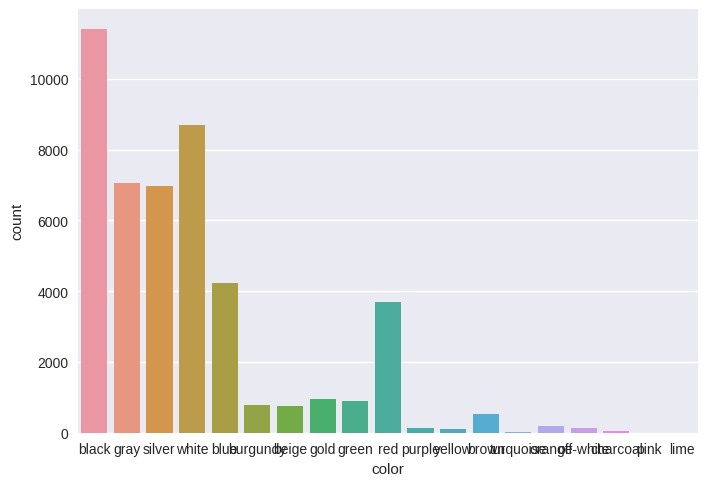

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

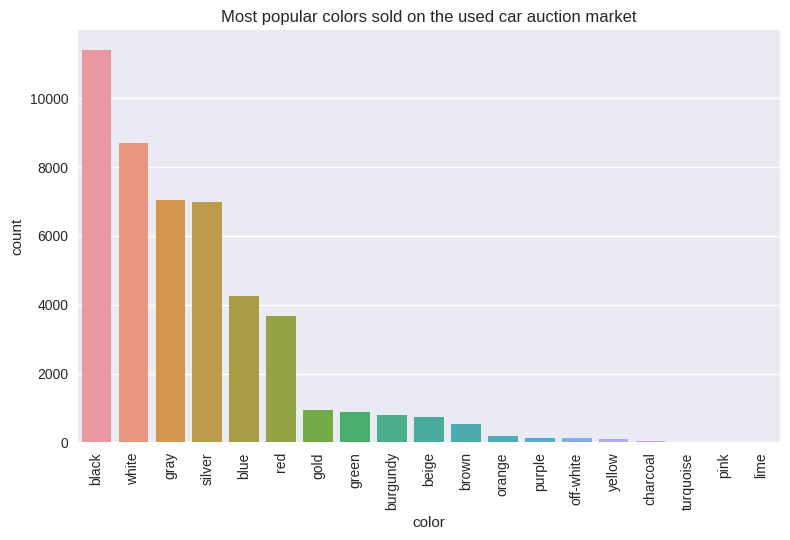

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

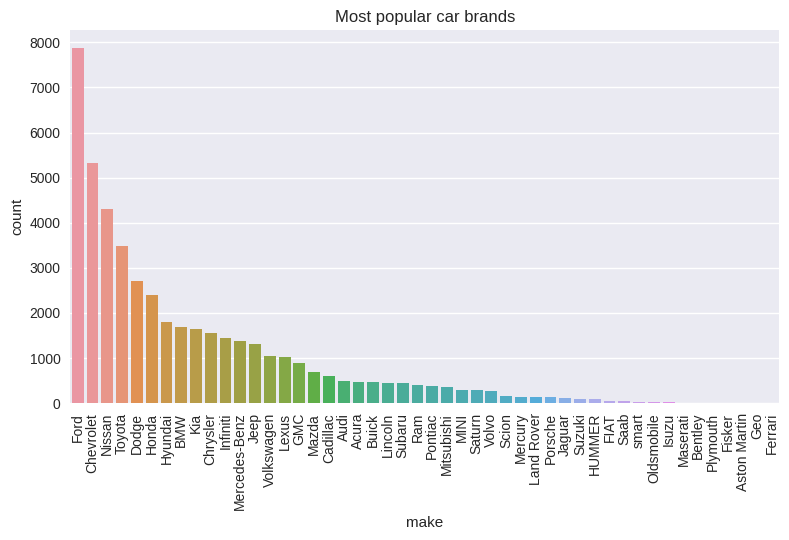

In [ ]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)  #grouping the data using the make column and sorting values according to the make that has highest number of occurences or values (descending order) the plotting a countplot
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**:

Ford, Chevrolet and Nissan are the most popular car brands





**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

In [ ]:

df.columns

Index(['year', 'make', 'model', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice'],
      dtype='object')

Text(0, 0.5, 'Mean Selling Price')

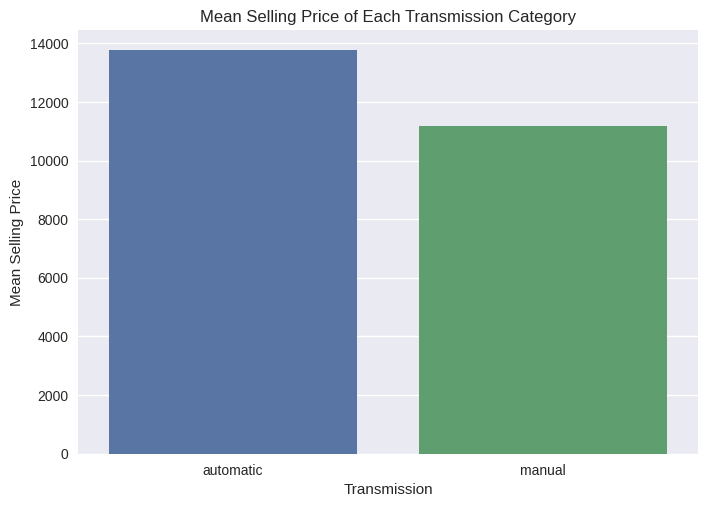

In [ ]:
mean_selling_price = df.groupby('transmission')['sellingprice'].mean().reset_index() # This allows us to group the data by column transmission and then calculate the mean selling price for each group and then put it in a variable that is then plotted and contains transmission and selling price. The average mean mentioned in the question made us do that.
sns.barplot(data=mean_selling_price, x='transmission', y='sellingprice').set(title='Mean Selling Price of Each Transmission Category')
plt.xlabel('Transmission')
plt.ylabel('Mean Selling Price')

**Answer for Q2**: yes automatic cars on average mean, sell for a higher price than manual cars as shown in the above figure where the automatic cars have a mean selling price of nearly 14,000 while the manual cars nearly 11,0000

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

Text(0.5, 1.0, 'Distribution of Selling Prices by Car Make')

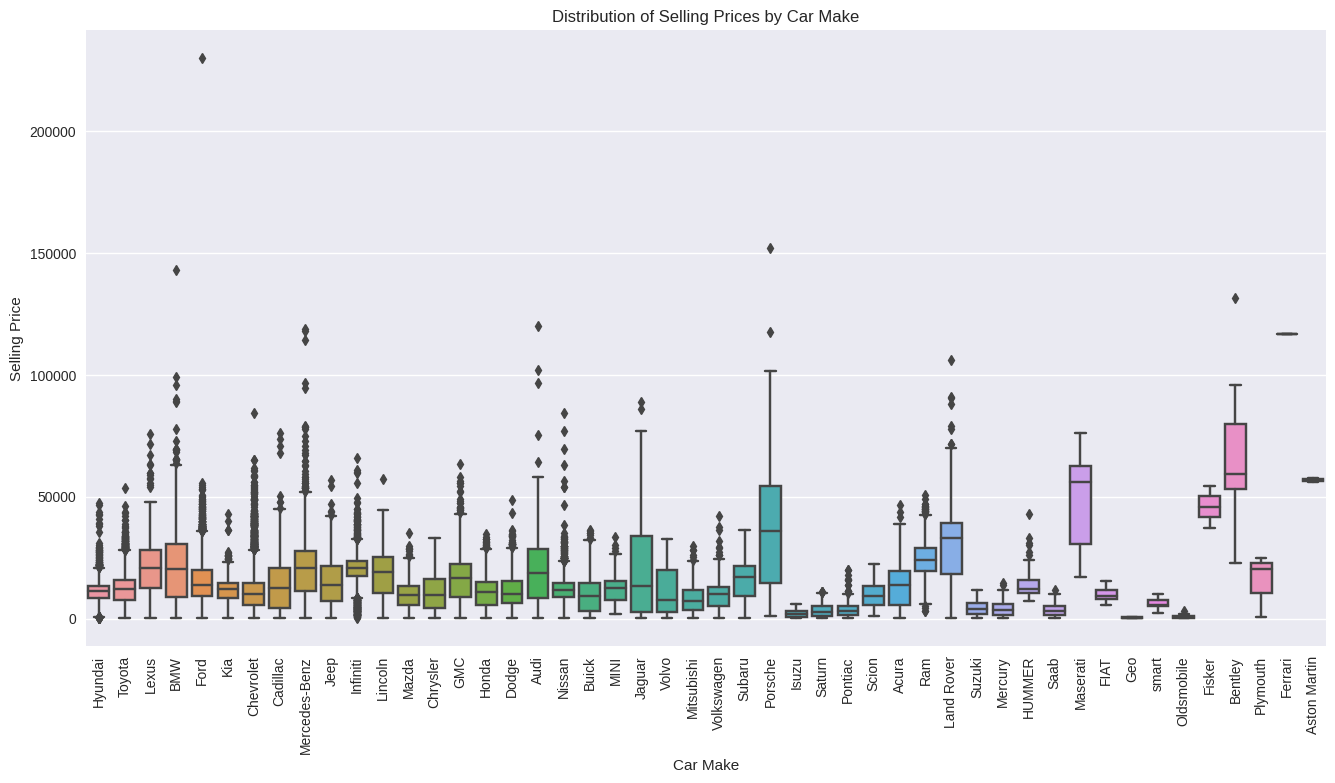

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='make', y='sellingprice')  # we assigned figsize and plotted the box plot using the dependant variable y which is the selling price and an independant variable which is make.
plt.xticks(rotation=90) #we used this as we have many x-axis labels and wanted them all to show
plt.xlabel('Car Make') #labeled x- axis
plt.ylabel('Selling Price') #labeled our y-axis
plt.title('Distribution of Selling Prices by Car Make')

**Answer for Q3** The two most car makes that have the widest distribution of selling price are the Porsche and Bentley. The porsche comes first followed by Bentley. We interpret the boxplot as follows we can say that based on the maximum value, a car make of Porsche has the highest selling price. followed by the bently.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:

corr = df.corr()  # produced the correlation matrix to see the correlation between the numerical variables and their coefficiants
corr


<ipython-input-59-b55e281dd63b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()  # produced the correlation matrix to see the correlation between the numerical variables and their coefficiants


,year,condition,odometer,sellingprice
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.580900
sellingprice,0.581164,0.529141,-0.580900,1.000000


In [ ]:
corr['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs()) #this shows the correlations between selling price and all other numerical variables and sorts it descendingly so that it shows what variables have the highest correlation whith selling price ranked from most to least

sellingprice    1.000000
year            0.581164
odometer       -0.580900
condition       0.529141
Name: sellingprice, dtype: float64

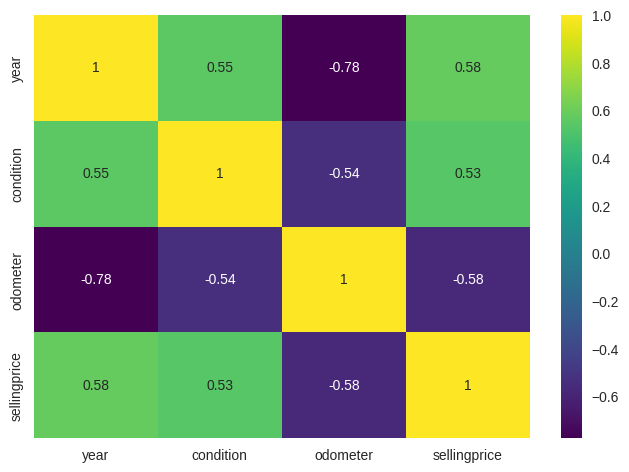

In [ ]:
sns.heatmap(corr, cmap='viridis', annot = True); #produced heatmap to visualize this as well

<ipython-input-62-ccf9aedeba26>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='odometer', y='sellingprice', data=df, palette='magma',ax=ax)


Text(0.5, 1.0, 'Scatter Plot of selling price vs odometer')

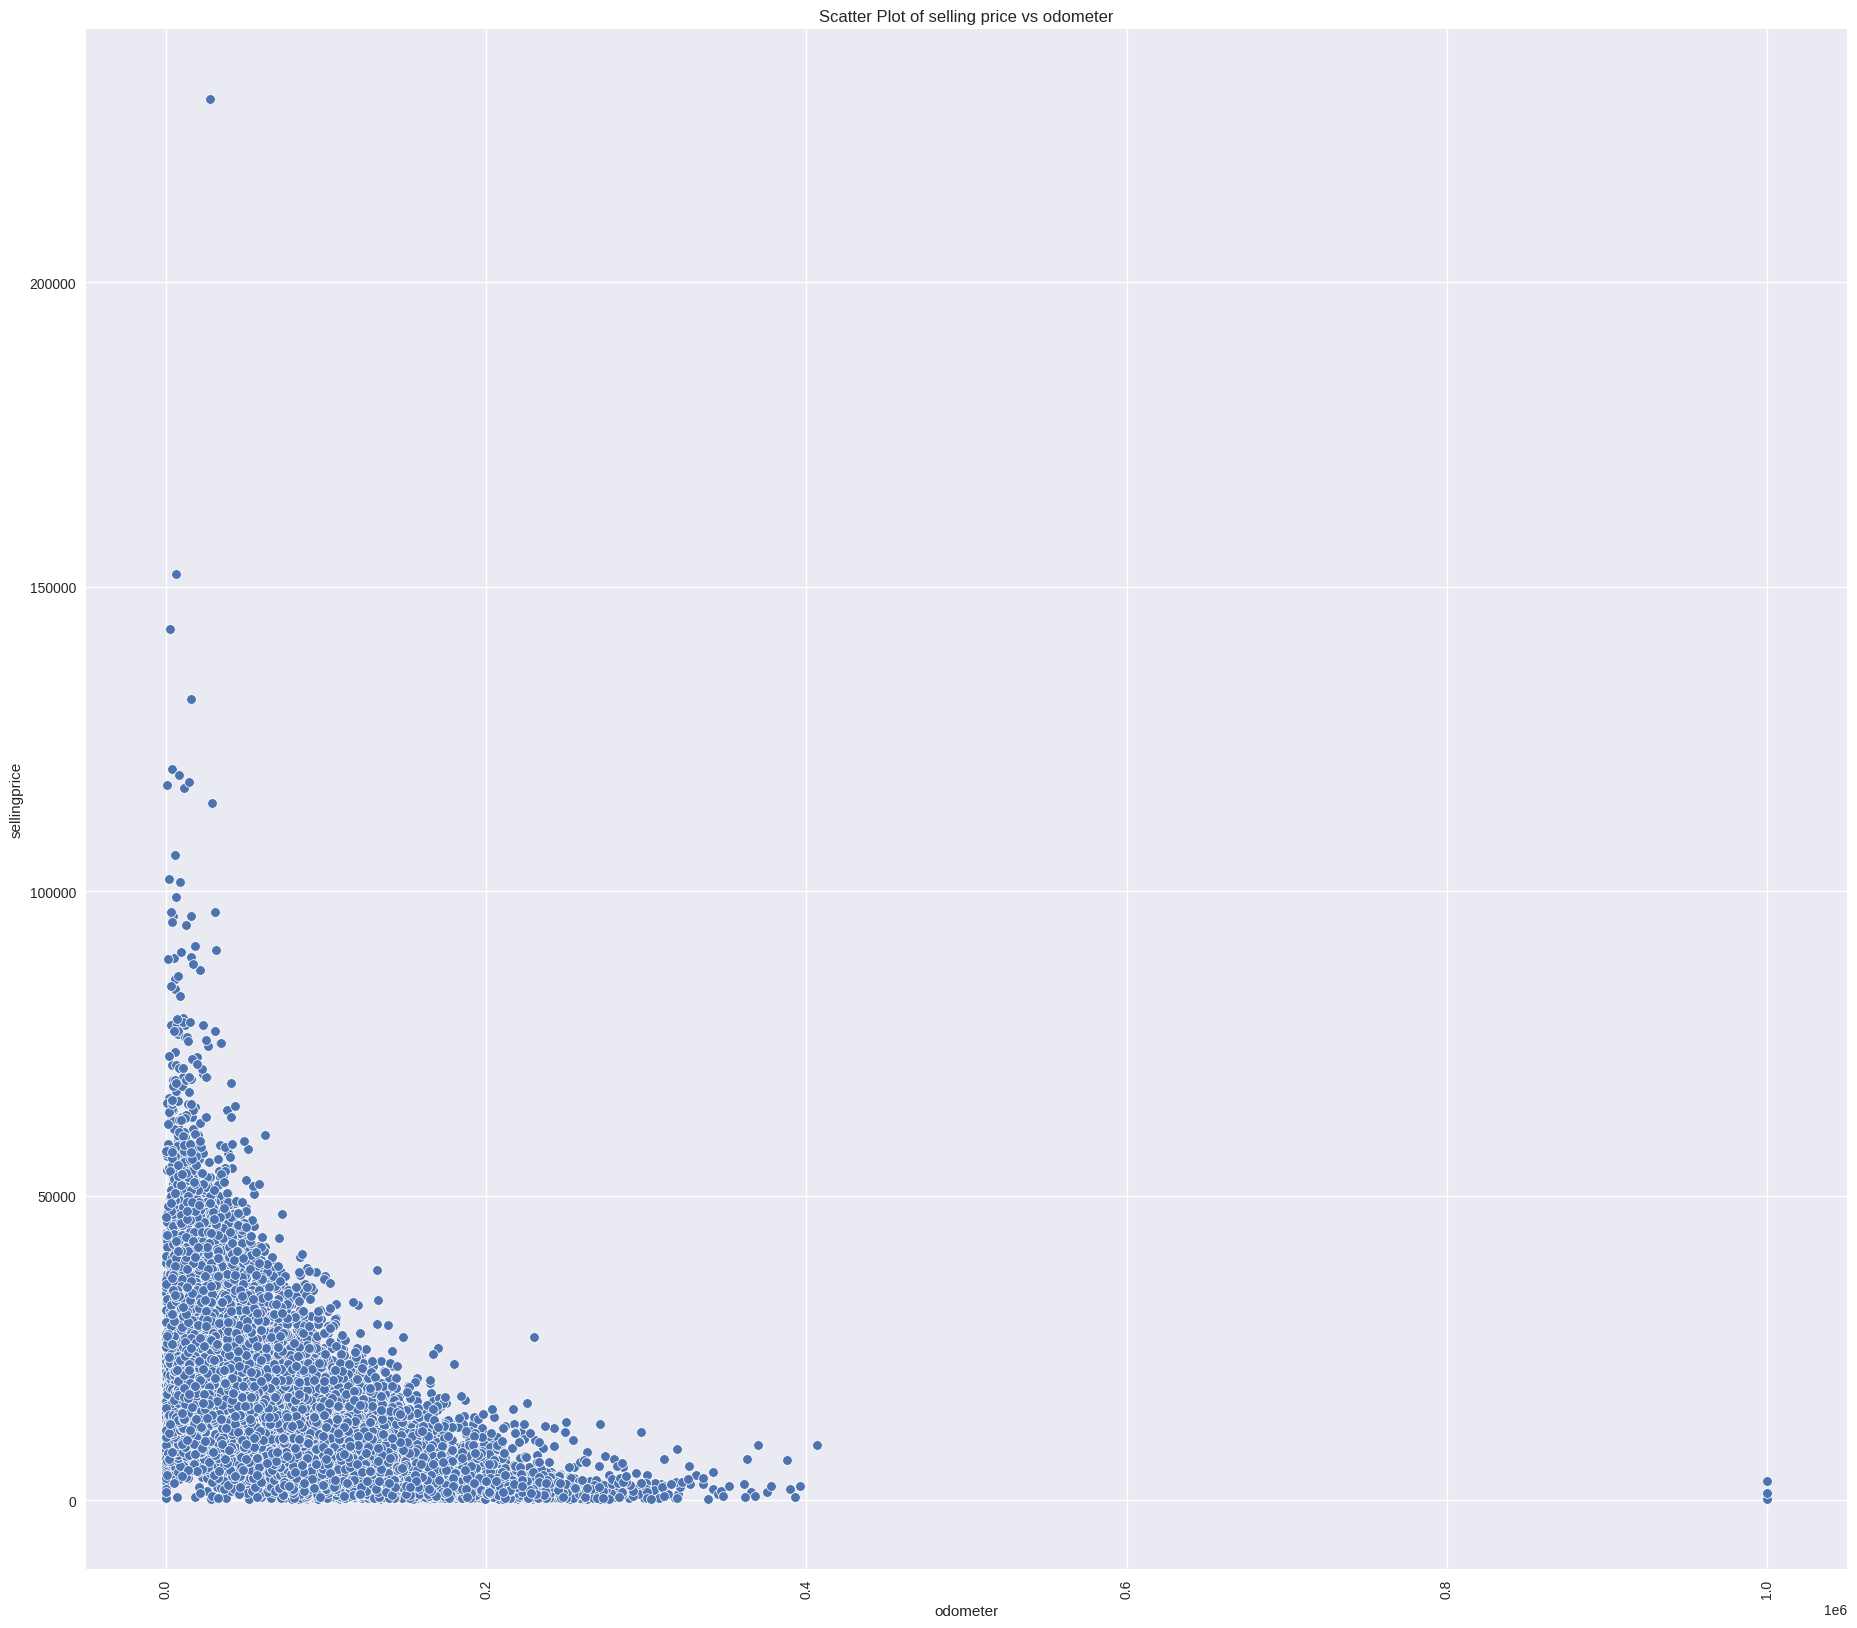

In [ ]:
f = plt.figure(figsize=(50,20)) # plotted a scatter plot using odometer and sellingprice to plot both numerical values against eachother
ax = f.add_subplot(121)
plt.xticks(rotation=90)
sns.scatterplot(x='odometer', y='sellingprice', data=df, palette='magma',ax=ax)
ax.set_title('Scatter Plot of selling price vs odometer')

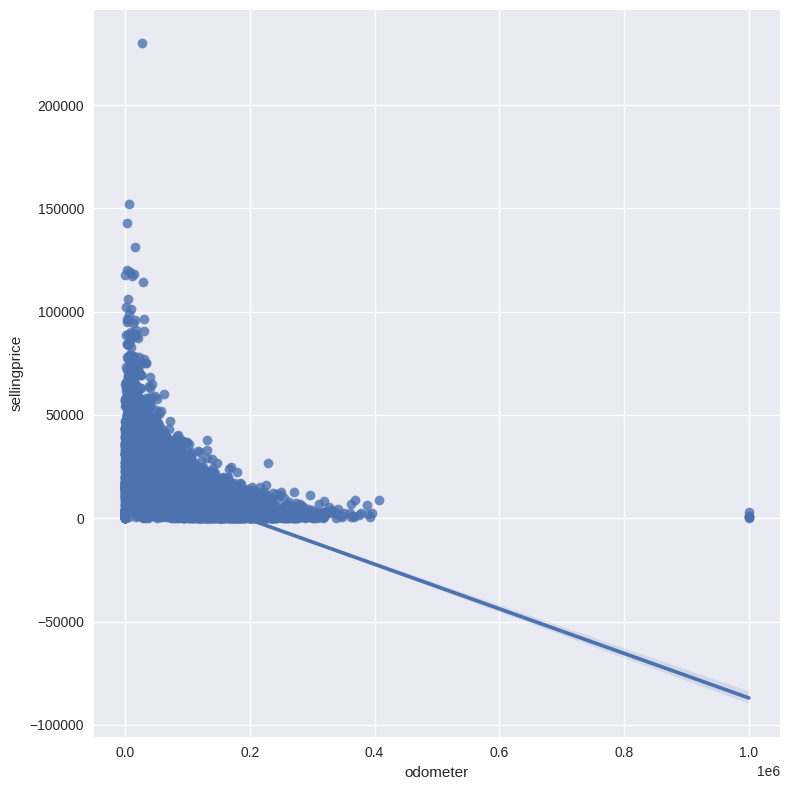

In [ ]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8);#plotted line of best fit


**Answer for Q4**: Your answer here

> The correlation between the odometer and the selling price is a negative relationship as according to the heat map and correlation we got there is a negative correlation between the odometer and the selling price. In addition to that, the line of best fit had a negative downward slope which shows in the scatter plot we drew. This indicates that whenever the odometer(mileage) increases the selling price decreases.



**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:

corr = df.corr()  # produced the correlation matrix to see the correlation between the numerical variables and their coefficiants
corr


<ipython-input-64-b55e281dd63b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()  # produced the correlation matrix to see the correlation between the numerical variables and their coefficiants


,year,condition,odometer,sellingprice
year,1.000000,0.549158,-0.777219,0.581164
condition,0.549158,1.000000,-0.540371,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.580900
sellingprice,0.581164,0.529141,-0.580900,1.000000


In [ ]:
corr['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs()) #this shows the correlations between selling price and all other numerical variables and sorts it descendingly so that it shows what variables have the highest correlation whith selling price ranked from most to least

sellingprice    1.000000
year            0.581164
odometer       -0.580900
condition       0.529141
Name: sellingprice, dtype: float64

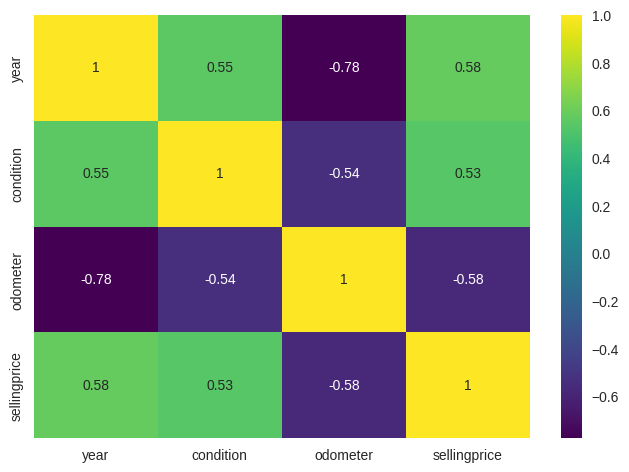

In [ ]:
sns.heatmap(corr, cmap='viridis', annot = True); #produced heatmap to visualize this as well

<ipython-input-67-e3cf0ccee935>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='condition', y='sellingprice', data=df, palette='magma',ax=ax)


Text(0.5, 1.0, 'Scatter Plot of selling price vs odometer ')

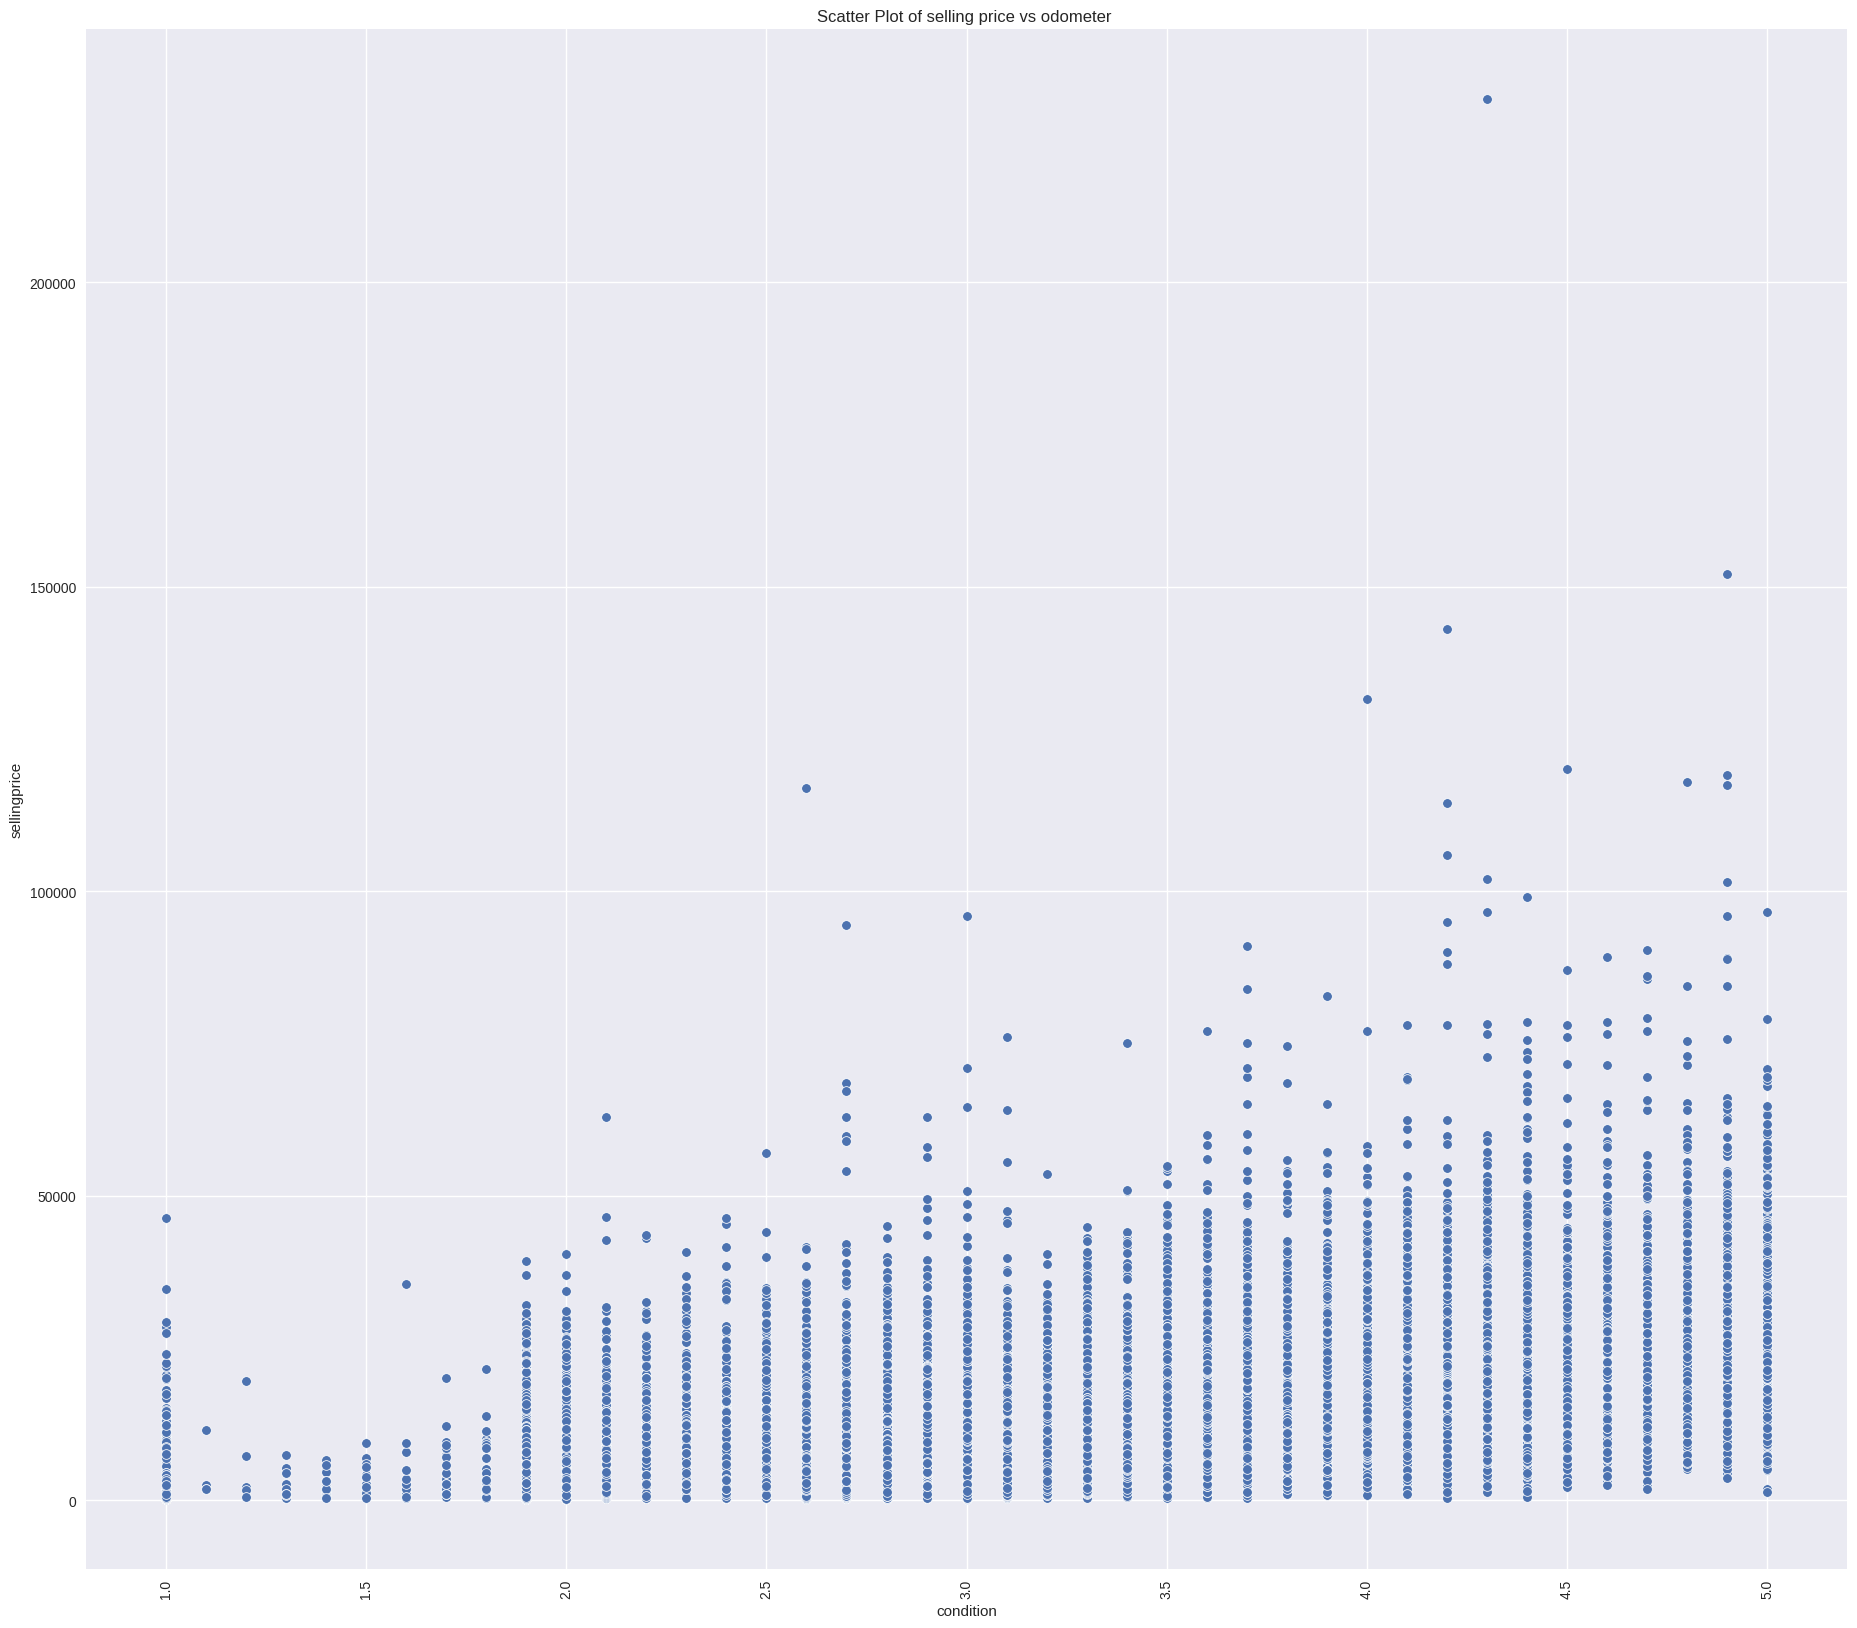

In [ ]:
f = plt.figure(figsize=(50,20)) # plotted a scatter plot using condition and sellingprice to plot both numerical values against eachother
ax = f.add_subplot(121)
plt.xticks(rotation=90)
sns.scatterplot(x='condition', y='sellingprice', data=df, palette='magma',ax=ax)
ax.set_title('Scatter Plot of selling price vs odometer ')

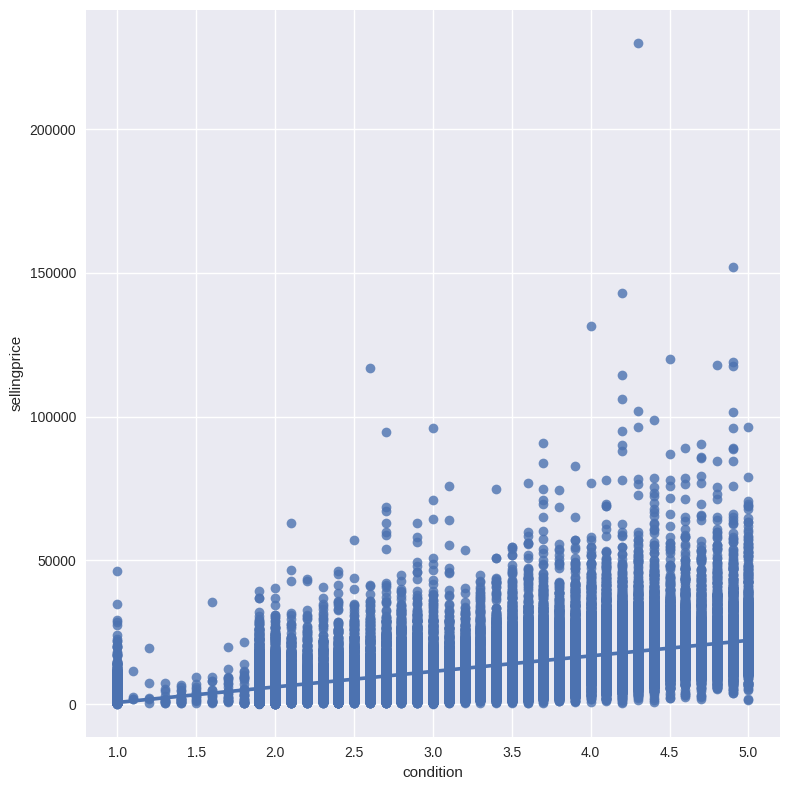

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8); #plotted line of best fit

**Answer for Q5**: According to the heatmap there is a positive correlation between the car's condition and the selling price. This was also shown in our data and in the line of best fit as our scatter plot has an upward positive slope. This proves that as a car's condition increases and becomes better, the selling price of the car increases.

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pickup truck'),
  Text(1, 0, 'Convertible'),
  Text(2, 0, 'Coupe'),
  Text(3, 0, 'Suv'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Sedan'),
  Text(6, 0, 'Hatchback'),
  Text(7, 0, 'Wagon')])

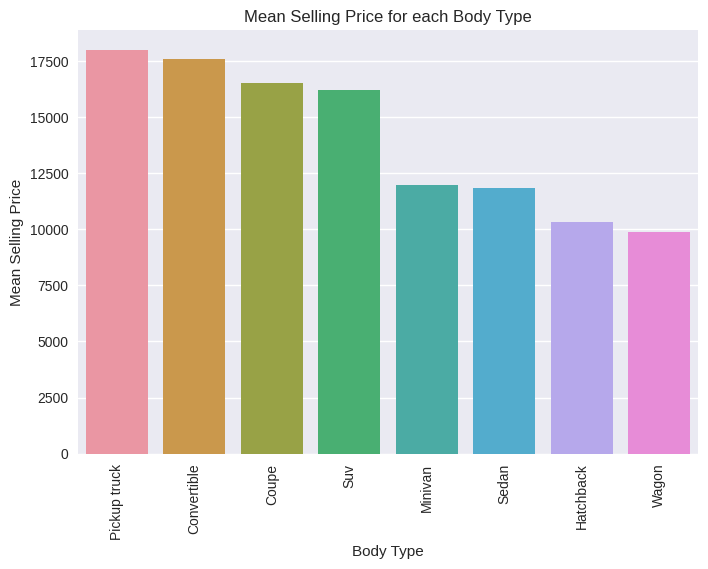

In [ ]:
mean_selling_price = df.groupby('body')['sellingprice'].mean().reset_index() #This allows us to group the data by column body and then calculate the mean selling price for each group and then put it in a variable that is then plotted and contains body and selling price. The average mean mentioned in the question made us do that.
mean_selling_price = mean_selling_price.sort_values(by='sellingprice', ascending=False) # sort values according to which mean selling price is higher descending order. ( sort the bodies accordingly)
sns.barplot(data=mean_selling_price, x='body', y='sellingprice')
plt.title('Mean Selling Price for each Body Type')
plt.xlabel('Body Type')
plt.ylabel('Mean Selling Price')
plt.xticks(rotation=90)

**Answer for Q6**: Yes, we believe that there are differences in the mean of the selling prices of each body type . It is shown here in our bar plot as pick up truck is the first with the highest mean selling price of higher than 17500. Convertible came in second with a mean selling price less than the pickup truck. The coupe comes third with a mean selling price of almost 16500. The fourth body type is the SUV with a mean selling price of almost 16000. The minivan comes in fifth followed by sedan closely in sixth place. The hatchback comes in seventh place with a mean selling price of almost 11000. The last and eightth position was taken by the wagon with a mean average price of almost 10000. The difference between the mean selling price of the pickup truck which has the highest mean selling price and the wagon that has the lowest mean selling price of almost 8000.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df.head() #Here we wanted to see what columns do we have

,year,make,model,body,transmission,condition,odometer,color,interior,sellingprice
0,2013,Hyundai,Sonata,Sedan,automatic,3.9,50404.0,black,gray,10900
1,2014,Toyota,4Runner,Suv,automatic,4.9,17846.0,gray,black,29900
2,2012,Lexus,IS 250,Sedan,automatic,4.1,21122.0,silver,black,24200
3,2002,BMW,X5,Suv,automatic,1.9,145303.0,black,black,3200
4,2014,Ford,E-Series Van,Minivan,automatic,4.9,6714.0,white,gray,22100


In [ ]:
df = df.drop('color', axis=1) #color does have have any impact on a car's performance or functionlaity

In [ ]:
df = df.drop('interior', axis=1) #interior color does have have any impact on a car's performance or functionlaity

In [ ]:
df = df.drop('model', axis=1)#the make variable already presented the information about car model where these two variables together are highly correlated and independent variables should not be highly correlated with each other
#when we added model variable our model has generated a -3 R squared which is a bad model.

In [ ]:
#df = df.drop('transmission', axis=1)
#here we recognized that the transmission variable is very important since the visualization it was shown that automatic cars on average mean, sell for a higher price than manual
#and from this info we recongize that transmission affects selling price

In [ ]:

categorical_columns = ['make','body','transmission']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

#we have used one-hot encoding since it is the appropriate technique as our the categorical variables are nominal ,where the make variable has different categories that
#has no ranking or order among them ,same concept for the body and the transmission


Columns in original data frame:
 ['year' 'make' 'body' 'transmission' 'condition' 'odometer' 'sellingprice']

Number of rows and columns in the dataset: (46578, 7)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' 'sellingprice' 'make_Aston Martin'
 'make_Audi' 'make_BMW' 'make_Bentley' 'make_Buick' 'make_Cadillac'
 'make_Chevrolet' 'make_Chrysler' 'make_Dodge' 'make_FIAT' 'make_Ferrari'
 'make_Fisker' 'make_Ford' 'make_GMC' 'make_Geo' 'make_HUMMER'
 'make_Honda' 'make_Hyundai' 'make_Infiniti' 'make_Isuzu' 'make_Jaguar'
 'make_Jeep' 'make_Kia' 'make_Land Rover' 'make_Lexus' 'make_Lincoln'
 'make_MINI' 'make_Maserati' 'make_Mazda' 'make_Mercedes-Benz'
 'make_Mercury' 'make_Mitsubishi' 'make_Nissan' 'make_Oldsmobile'
 'make_Plymouth' 'make_Pontiac' 'make_Porsche' 'make_Ram' 'make_Saab'
 'make_Saturn' 'make_Scion' 'make_Subaru' 'make_Suzuki' 'make_Toyota'
 'make_Volkswagen' 'make_Volvo' 'make_smart' 'body_Coupe' 'body_Hatchback'
 'body_Minivan' 'body_Pi

In [ ]:
df_encode.head()

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup truck,body_Sedan,body_Suv,body_Wagon,transmission_manual
0,2013,3.9,50404.0,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2014,4.9,17846.0,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2012,4.1,21122.0,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2002,1.9,145303.0,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2014,4.9,6714.0,22100,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.head()

,year,make,body,transmission,condition,odometer,sellingprice
0,2013,Hyundai,Sedan,automatic,3.9,50404.0,10900
1,2014,Toyota,Suv,automatic,4.9,17846.0,29900
2,2012,Lexus,Sedan,automatic,4.1,21122.0,24200
3,2002,BMW,Suv,automatic,1.9,145303.0,3200
4,2014,Ford,Minivan,automatic,4.9,6714.0,22100


In [ ]:
numerical_columns = ['condition', 'odometer','year']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

#the categorical variables has been already encoded ,we normalize numeric variables in order to o fall within a smaller, specified standardized range,also to prevent
#variables that have a larger magnitude from unreasoanble model's perfromance

,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup truck,body_Sedan,body_Suv,body_Wagon,transmission_manual
0,0.92,0.725,0.050403,10900,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.96,0.975,0.017845,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.88,0.775,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.48,0.225,0.145302,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.96,0.975,0.006713,22100,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])
#the model's should be general and evaluated on a data that the model has not seen before to evaluate performance,so we split the data,some for training the model and some used only for testing

Training dataset size: 37262
Testing dataset size: 9316


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);
#importing sklearn's LinearRegression model and fit in order to train data

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df
#we try to find the theta values in order to substitute any independent variables to predict a dependent variable

,parameter,column,theta_value
0,theta_0,y-intersect,-2172.993963
1,theta_1,year,24097.800974
2,theta_2,condition,6820.586236
3,theta_3,odometer,-42823.891826
4,theta_4,make_Aston Martin,37203.787815
5,theta_5,make_Audi,3997.551731
6,theta_6,make_BMW,4913.132236
7,theta_7,make_Bentley,51233.525749
8,theta_8,make_Buick,-3297.523839
9,theta_9,make_Cadillac,794.467195


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)


The root mean square error (RMSE) is:  5447.509814688931
R^2 obtained is: 0.6788013037728274


In [ ]:
# BONUS NOT NECEESSARY
from scipy import stats
# Define your dependent variable (target) and independent variables (features)
X = df_encode.drop("sellingprice", axis=1) # Replace with your feature columns
y = df_encode['sellingprice']  # Replace with your target column

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Calculate residuals
predicted_y = model.predict(X)
residuals = y - predicted_y

# Calculate Z-scores for residuals
z_scores = np.abs(stats.zscore(residuals))

# Define a Z-score threshold to identify outliers (e.g., threshold of 3)
outlier_threshold = 3

# Identify and remove outliers
filtered_data = df_encode[(z_scores < outlier_threshold)]

# Re-fit the model with the filtered data
X_filtered = filtered_data.drop("sellingprice", axis=1)
y_filtered = filtered_data['sellingprice']

model.fit(X_filtered, y_filtered)

# Evaluate the model with the filtered data
predicted_y_filtered = model.predict(X_filtered)
mse = mean_squared_error(y_filtered, predicted_y_filtered)
print("Mean Squared Error (MSE) after removing outliers:", mse)


Mean Squared Error (MSE) after removing outliers: 17484718.584037594


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**:
With an RMSE of 5447.51, the linear regression model predicts values that are, on average, within 5447.51 units of the actual values.
The model explains about 67.98% of the variability in the dependent variable, according to the R^2 value of 0.679, which suggests that while it offers a reasonably good fit to the data, there is still opportunity for improvement.

 The lower the RMSE the better and ours is interpreted as for each car there is a 5447.51$ off compared to actual prices and the reason behind this is that there is a wide range and distributions of most of our numerical columns in our data set. It is important to carefully choose the desirable features in the feature selection phase because many features can be irrelevant and introduce noisy data and outliers.Feature selection techniques can help identify the the most related independant variables with the dependant variable. We would recommend this model for a used cars dealership as it offers a reasonably good fit to the data ,however,there is still opportunity for improvement.